<a href="https://colab.research.google.com/github/mariaeco/imersao-dados-desafio-final/blob/main/Sele%C3%A7%C3%A3o_de_Vari%C3%A1veis_e_Compostos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO IMERSÃO ALURA**

Esse projeto foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no Kaggle.

Perguntas Iniciais:

1) Quais compostos tiveram algum efeito na ativação dos genes? Se o composto não teve efeito, não continuar a análise com ele. (Não significa que não ter efeito não é importante, se um composto for ruim, então é bom que ele não tenha efeito)

2) Se apresentaram efeito, quais apresentaram efeito positivo sobre a ativação do gene e quais apresentaram efeito negativo?

3) Qual o mecanismo de ação (banco de dados 2) principal para o efeito sobre o gene?

Importante A quantidade de genes e compostos é enorme. Como trabalhar com isso? Selecionar o que vamos trabalhar? Então saber se o composto não teve efeito já é uma eliminação de variáveis. Mas as vezes um composto tem efeito sobre um gene ou grupo de genes e sobre outros não. Como tratar isso?

*Pacotes utilizados:*

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Juntando as Planilha dos Experimentos e Resultados
O que é o banco experimento e o que é o resposta?
* Os "g" são as expressões gênicas - que são respostas
* Os "c" são as células que receberam os tratamentos - o valor é a viabilidade

In [71]:
dados_exp = pd.read_csv('https://github.com/mariaeco/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados_exp.columns = dados_exp.columns.str.replace('-', '')
dados_exp.rename(columns={'droga': 'composto'}, inplace=True)
dados_exp

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

In [72]:
dados_resultados = pd.read_csv('https://github.com/mariaeco/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dados_resultados
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = ( dados_resultados['n_moa'] != 0)


### Merge

In [73]:
dados = pd.merge(dados_exp, dados_resultados, on='id')
#renomeando pra ficar mais bonito
dados.sort_values(['tratamento', 'composto', 'dose'], inplace=True)
dados['composto'] = dados['composto'].replace({'cacb2b860': 'Controle'})
dados['tratamento'] = dados['tratamento'].replace({'com_controle': 'Controle','com_droga': 'Tratamento' })
dados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
25,id_0054388ec,Controle,48,D1,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
38,id_0079af0fb,Controle,24,D1,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
81,id_00d575cfb,Controle,72,D1,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
148,id_01b05de6c,Controle,48,D1,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
175,id_01f1c58a2,Controle,72,D1,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22773,id_f48c19472,Tratamento,72,D1,fff7d208d,0.5408,-1.4560,-0.1473,0.4003,0.2285,0.3690,1.1740,-0.5140,-1.0500,-0.4816,0.4252,-0.7625,1.5500,1.2170,0.3908,-1.3730,0.5137,0.4466,1.1670,0.2632,0.1771,-0.3740,0.8383,-2.0820,-0.3954,1.4400,0.4031,0.3557,0.9868,0.7782,0.4559,-0.1629,0.2494,-0.1824,0.5438,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23637,id_fdf860f5f,Tratamento,24,D1,fff7d208d,0.3602,0.1099,-0.2263,0.3325,0.6581,-0.6463,0.1821,-0.4568,-0.3015,0.0829,-0.3963,-0.1849,1.0660,0.8443,0.7604,-0.5483,0.0097,0.5490,0.3318,0.0000,-1.1260,-1.3260,0.6020,-1.0270,-0.7888,0.8839,-0.0975,-0.4090,0.2714,0.51

In [74]:
dados.ativo_moa.unique()

array([False,  True])

## Escolhendo qual subconjunto de dados trabalhar
* Escolhendo os compostos que vamos trabalhar com base no principio ativo, o principio ativo que tenha mais compostos

In [75]:
dados.drop(['id', 'tempo'], axis=1).select_dtypes('int64').sum(axis=0).sort_values(ascending=False).head(10)

n_moa                             16844
nfkb_inhibitor                      832
proteasome_inhibitor                726
cyclooxygenase_inhibitor            435
dopamine_receptor_antagonist        424
serotonin_receptor_antagonist       404
dna_inhibitor                       402
glutamate_receptor_antagonist       367
adrenergic_receptor_antagonist      360
cdk_inhibitor                       340
dtype: int64

Com base no resultado acima ficou notável que o princípio ativo ```nfkb``` foi o que apresentou a maior quantidade de compostos
Vamos trabalhar com ele inicialmente

In [76]:
sub_data = dados.query('nfkb_inhibitor > 0 | tratamento == "Controle"')
sub_data
# é o mesmo que dados[(dados['nfkb_inhibitor'] > 0) | (dados['tratamento']=='com_controle')]

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
25,id_0054388ec,Controle,48,D1,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
38,id_0079af0fb,Controle,24,D1,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
81,id_00d575cfb,Controle,72,D1,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
148,id_01b05de6c,Controle,48,D1,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
175,id_01f1c58a2,Controle,72,D1,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529,id_7178e42ef,Tratamento,24,D1,f60388237,0.2693,0.9886,0.1210,-0.4752,-0.3997,-1.7820,-1.0060,1.3100,-0.4478,1.4990,-1.2080,-1.7410,0.8301,-0.1715,-1.9990,0.0348,-0.7874,0.0087,0.1693,0.7240,-1.5570,-0.0800,-0.9423,-0.1714,-0.3942,-0.1990,0.5888,-1.3240,-0.7402,-0.2822,-0.2708,0.1447,0.5850,-0.4957,1.1590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
17096,id_b810ccd1c,Tratamento,48,D1,f60388237,-0.1013,0.1885,-0.1874,0.5962,-0.0206,-0.0087,-1.2070,0.8762,-0.5401,-1.1610,0.6889,0.0460,-0.5643,-0.6220,-0.7289,0.4890,-0.3350,0.4488,0.2506,-0.0421,-0.4553,0.1079,0.3494,0.0000,-0.3316,-0.2495,0.5952,0.1892,-

 Reduzi para 20 compostos sendo 1 o controle

In [77]:
sub_data.tratamento.value_counts()

Controle      1866
Tratamento     832
Name: tratamento, dtype: int64

In [78]:
sub_data.composto.value_counts(ascending=False)[:8]

Controle     1866
87d714366     718
50e38451f      12
508e74297       7
3ee3c4f73       6
b79576a34       6
6d4b8a98c       6
786d83020       6
Name: composto, dtype: int64

**Vemos acima que:**

---

1) O Controle tem bastante réplica

2) Temos o composto '87d714366' com 718 amostras, as quais são: 718/2 doses/ 3 tempos =~ 120 replicas

3) O composto '50e38451f' com 12 amostras, sendo: 12/2/3 = 2 réplicas

4) o restante dos compostos com 7/6 anmostras que terão apenas **1 réplica** (6/3/2), ou seja, são compostos que não podemos usá-los para a análise se não tiverem inseridos dentro de um grupo, pois uma réplica não representa nada.

*Vamos explorar um pouco mais abaixo, e avaliar se mantemos eles como ```nfkb_inhibitor``` ou não.*

In [79]:
sub_data.query('composto != "Controle"')['composto'].value_counts(normalize=True)*100 # observe a baixa quantidade dos demais compostos

87d714366    86.298077
50e38451f     1.442308
508e74297     0.841346
3ee3c4f73     0.721154
0f47f25d6     0.721154
02b14dcc0     0.721154
6d4b8a98c     0.721154
d2d7e1eab     0.721154
b5e8fd5b5     0.721154
786d83020     0.721154
0fa4c6156     0.721154
b79576a34     0.721154
b1b429d55     0.721154
ba9f99c9c     0.721154
f60388237     0.721154
91dc8bab8     0.721154
838575b1d     0.721154
9f9f2cc3e     0.721154
f344437e0     0.600962
Name: composto, dtype: float64

Vamos observar o comportamento destes compostos em relação ao controle:

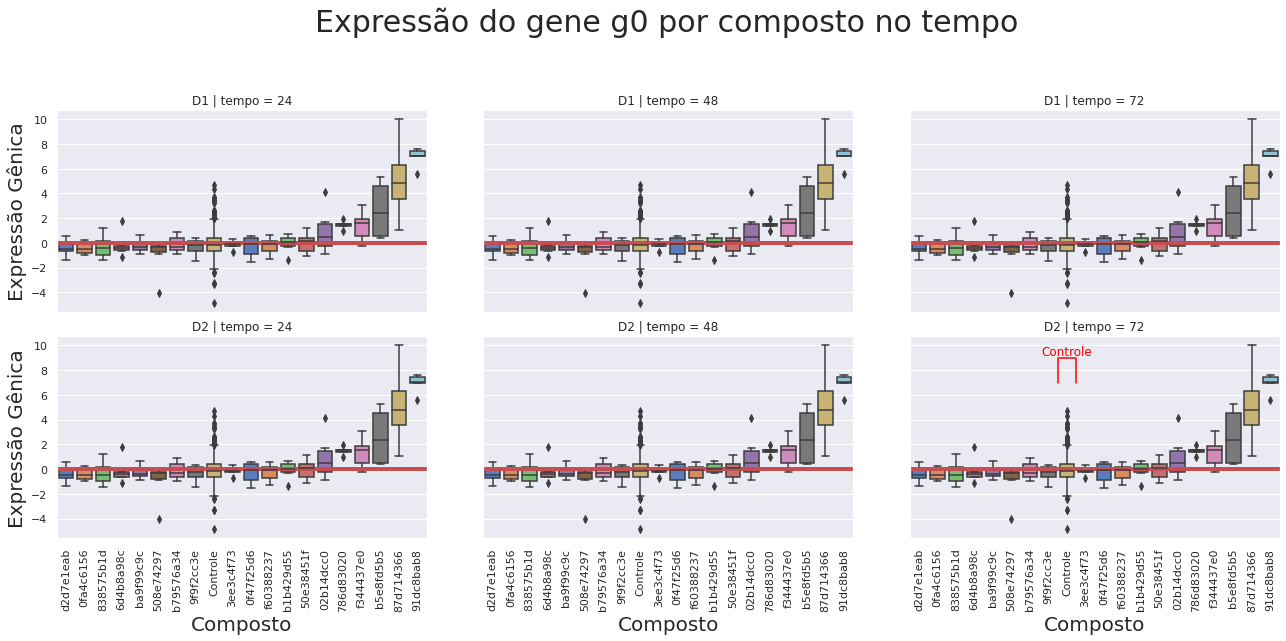

In [80]:
sns.set();
cod_compostos = sub_data.composto.value_counts().index[:21];
selected_compostos =sub_data.query('composto in @cod_compostos');

#para ordenar
grouped = selected_compostos.loc[:,['composto', 'g0']] \
    .groupby(['composto']) \
    .median() \
    .sort_values(by='g0')

#@title
g = sns.FacetGrid(selected_compostos,col='tempo',row='dose', despine=False, 
                  height=4, aspect=1.5);

g.map(sns.boxplot,x='composto',y='g0', palette='muted',order=grouped.index,
      data=selected_compostos);

g.map(plt.axhline, y=0, color = 'r', ls = '-', linewidth=4);
g.set_axis_labels("Composto", "Expressão Gênica", fontsize=20);
g.set_titles(row_template="{row_name}", fontsize=20);
g.set_xticklabels(rotation=90);
g.fig.subplots_adjust(top=0.80);
g.fig.suptitle('Expressão do gene g0 por composto no tempo', fontsize=30);

x1, x2= 7.5,8.5
y, h, col = selected_compostos['g0'].max()*0.7, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='red')
plt.text((x1+x2)*.5, y+h, "Controle", ha='center', va='bottom', color='red');

### Alguns comentários sobre a figura acima

1. Observamos que a maioria dos compostos *'aparentemente'* não diferem do controle. 

2. Temos os compostos (por ordem de surgimento nas figuras): '786d83020', 'f344437e0', 'b5e8fd5b5', '87d714366', '91dc8bab8' apresentaram aparentemente uma expressão gênica maior que o controle. Os demais tratamentos estão todos na linha do controle (Expressão genica = zero)

3. Isso foi independente da dose

4. Também não há uma grande mudança em relação ao tempo

*OBS: temos que ter em mente que isso é relacionado ao G0*

Vamos ver agora para alguns outros genes e eliminar os compostos que não tiveram influência

###**Vamos supor que a dose não influência e vamos tentar fazer um  mapa do efeito desses compostos sobre a expreção gênica dos diversos genes da tabela**

In [81]:
# tenho que fazer um melt aqui para rodar para todos os genes
# selecionando aleatoriamente 6 colunas de genes para plotagem do gráfico
# a cada vez que executado gera captar 6 novos genes para avaliar
import random
lista =[]
for col in selected_compostos.columns:
    if (col[0] == 'g') and len(col)<5:
      lista.append(col)
lista = random.sample(lista, 6)


gens = selected_compostos[lista] #all gens go from 5:777
gens_data = pd.melt(selected_compostos, id_vars=['id','tratamento','tempo','dose',	'composto'], value_vars=gens )
gens_data.rename(columns={'value': 'Expression', 'variable':'Gene'}, inplace=True)
gens_data

,id,tratamento,tempo,dose,composto,Gene,Expression
0,id_0054388ec,Controle,48,D1,Controle,g237,-0.0490
1,id_0079af0fb,Controle,24,D1,Controle,g237,0.1855
2,id_00d575cfb,Controle,72,D1,Controle,g237,-0.1251
3,id_01b05de6c,Controle,48,D1,Controle,g237,-0.4054
4,id_01f1c58a2,Controle,72,D1,Controle,g237,0.0683
...,...,...,...,...,...,...,...
16183,id_7178e42ef,Tratamento,24,D1,f60388237,g426,1.4730
16184,id_b810ccd1c,Tratamento,48,D1,f60388237,g426,0.4237
16185,id_2a59c8d42,Tratamento,24,D2,f60388237,g426,-0.4789
16186,id_55b95df28,Tratamento,48,D2,f60388237,g426,-0.1883


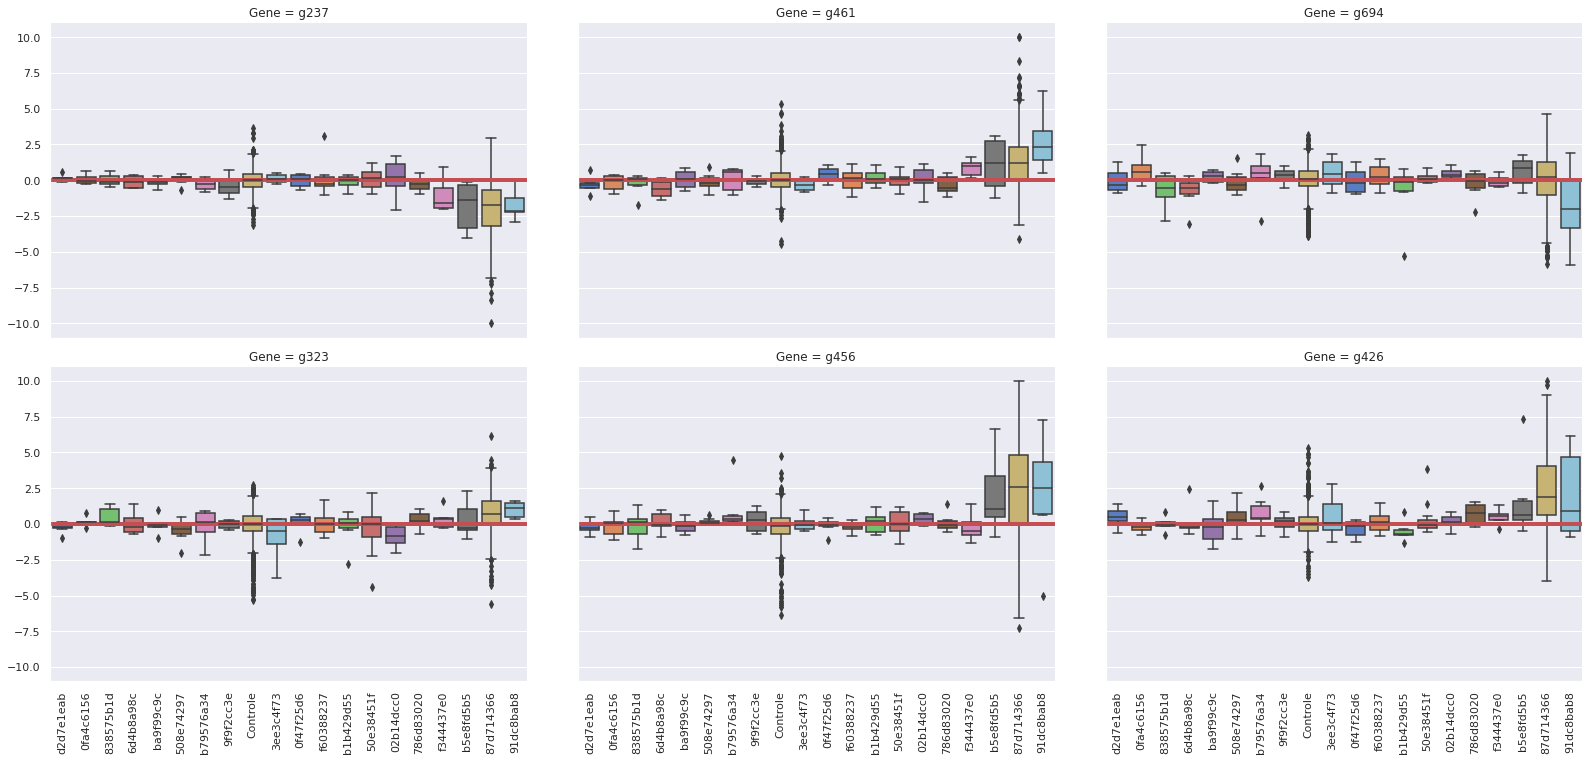

In [82]:
sns.set();
g = sns.catplot(x="composto", y="Expression", #hue = dose
                col="Gene",col_wrap=3, palette='muted',
                data=gens_data, kind="box",order=grouped.index,
                height=5, aspect=1.5);
g.map(plt.axhline, y=0, color = 'r', ls = '-', linewidth=4);
g.set_xticklabels(rotation=90);

Como podemos observar acima,plotando alguns genes, só os 4 último compostos tem algum tipo de efeito na expressão. Se rodarmos para os demais genes vai dar sempre esse padrão. Então, vamos eliminar todos os demais compostos.

In [89]:
selected_compostos.to_csv('/content/selected_compostos.csv', index=False)

In [85]:
selected_compostos.drop('id', axis=1).sum(axis=1)

25       101.8037
38        43.4533
81        90.9482
148      140.0798
175       52.8138
           ...   
10529    -13.2246
17096     25.6072
3964      33.9227
7986      98.5719
8406     132.3718
Length: 2698, dtype: float64

In [87]:
selected_compostos.ativo_moa.unique()

array([False,  True])